In [ ]:
!pip install duckdb streamlit matplotlib plotly seaborn pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


**Understanding Breast Cancer Patterns from a dataset**

Breast cancer remains one of the most prevalent cancers globally, significantly impacting the lives of millions. Early detection and effective treatment are critical in improving survival rates and quality of life for patients. However, identifying key factors that predict recurrence or influence treatment outcomes remains a challenge.

This project aims to analyze a breast cancer dataset obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia and which is available at UC Irvine Nachine Learning Repository. The goal is to provide insights based on this analysis that could support decision-making in clinical practice and improve personalized care strategies.

The following table represents the processed and structured data derived from the raw dataset, specifically designed for the analysis of breast cancer recurrence patterns.

In [ ]:
import duckdb
import plotly.express as px
import seaborn as sns
conn = duckdb.connect()
query = """
CREATE TABLE BreastCancer AS
SELECT
    column0 AS Class,
    column1 AS age,
    column2 AS menopause,
    column3 AS tumor_size,
    column4 AS inv_nodes,
    column5 AS node_caps,
    column6 AS deg_maling,
    column7 AS breast,
    column8 AS breast_quad,
    column9 AS irradiant
FROM read_csv_auto('/content/breast-cancer.data');
"""
conn.execute(query)
query = """
select *
from BreastCancer
"""
df = conn.sql(query).df()
df

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_maling,breast,breast_quad,irradiant
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,False
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,False
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,False
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,False
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,False
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,False
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,True
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,False
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,False


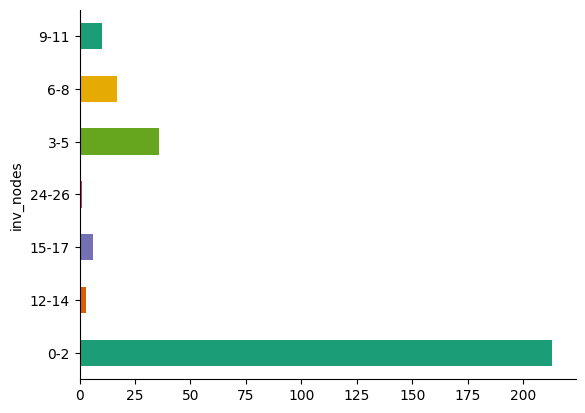

In [ ]:
#inv_nodes frequency

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('inv_nodes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

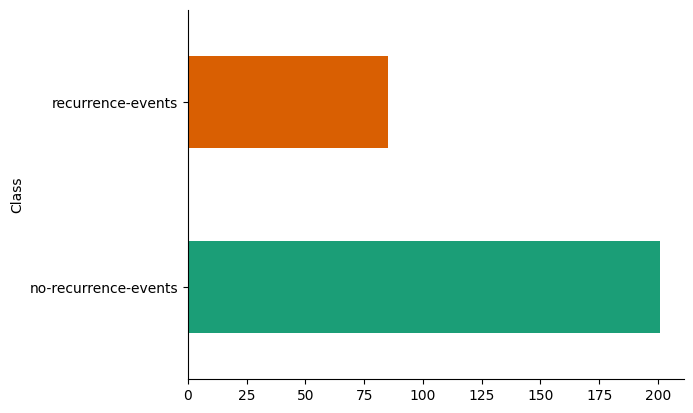

In [ ]:
#Class frequency

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

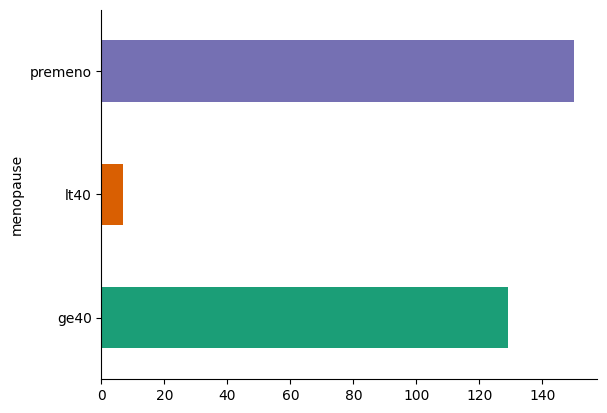

In [ ]:
#Menopause distribution

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('menopause').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

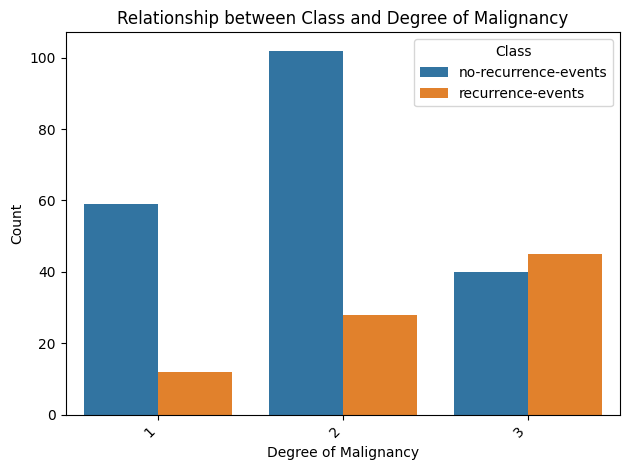

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
sns.countplot(data=df, x='deg_maling', hue='Class')
plt.xlabel('Degree of Malignancy')
plt.ylabel('Count')
plt.title('Relationship between Class and Degree of Malignancy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-13-40267b2d7c43>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='deg_maling', columns='inv_nodes', aggfunc='size', fill_value=0)


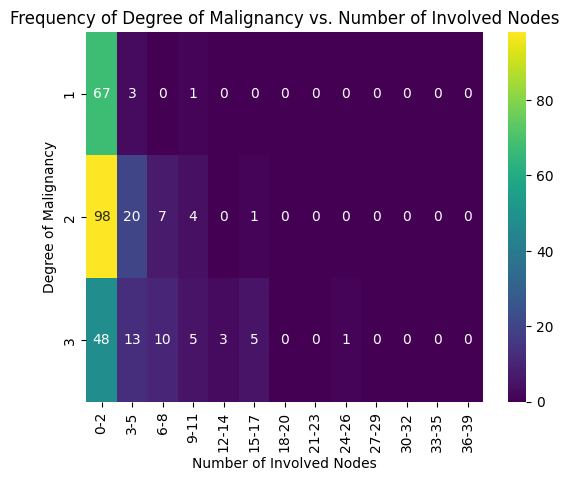

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct order for 'inv_nodes'
inv_nodes_order = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20',
                   '21-23', '24-26', '27-29', '30-32', '33-35', '36-39']

# Convert 'inv_nodes' to categorical with the correct order
df['inv_nodes'] = pd.Categorical(df['inv_nodes'], categories=inv_nodes_order, ordered=True)

# Create a pivot table for frequencies
heatmap_data = df.pivot_table(index='deg_maling', columns='inv_nodes', aggfunc='size', fill_value=0)

# Plot the heatmap
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis')
plt.title('Frequency of Degree of Malignancy vs. Number of Involved Nodes')
plt.xlabel('Number of Involved Nodes')
plt.ylabel('Degree of Malignancy')
plt.show()


<ipython-input-11-3ed57cfc7526>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='inv_nodes', y='deg_maling', order=inv_nodes_order, palette='muted')


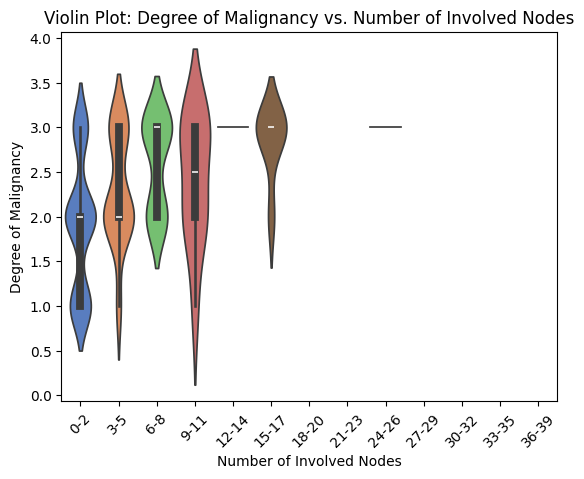

In [ ]:
sns.violinplot(data=df, x='inv_nodes', y='deg_maling', order=inv_nodes_order, palette='muted')

# Add titles and labels
plt.title('Violin Plot: Degree of Malignancy vs. Number of Involved Nodes')
plt.xlabel('Number of Involved Nodes')
plt.ylabel('Degree of Malignancy')
plt.xticks(rotation=45)
plt.show()



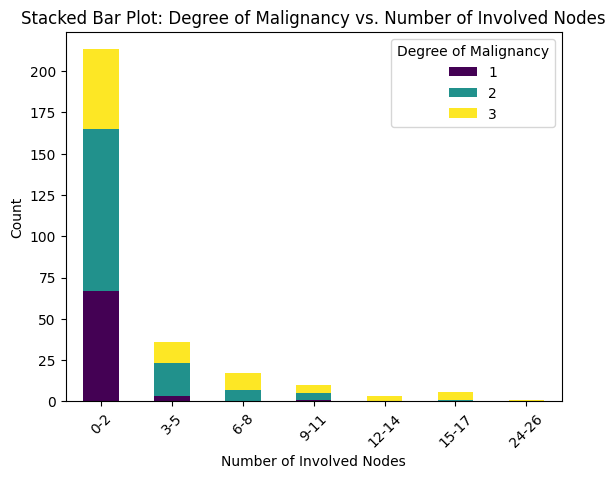

In [ ]:
# Create a stacked bar plot
stacked_data = pd.crosstab(df['inv_nodes'], df['deg_maling'])
stacked_data.plot(kind='bar', stacked=True, colormap='viridis')

# Add titles and labels
plt.title('Stacked Bar Plot: Degree of Malignancy vs. Number of Involved Nodes')
plt.xlabel('Number of Involved Nodes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Degree of Malignancy')
plt.show()


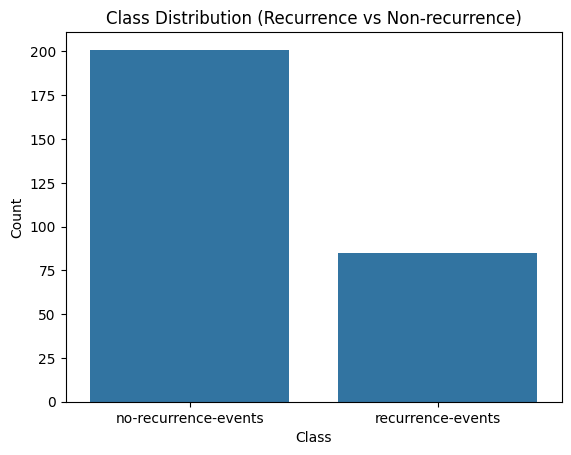

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Class')
plt.title('Class Distribution (Recurrence vs Non-recurrence)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


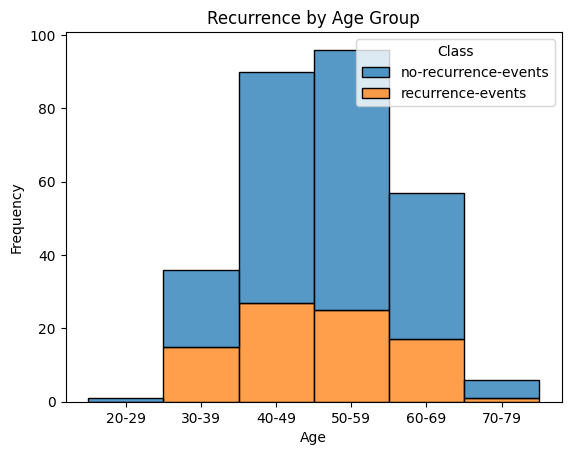

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct order for the age groups
age_order = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Convert 'age' to a categorical variable with the correct order
df['age'] = pd.Categorical(df['age'], categories=age_order, ordered=True)

# Recreate the plot
sns.histplot(data=df, x='age', hue='Class', multiple='stack')
plt.title('Recurrence by Age Group')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


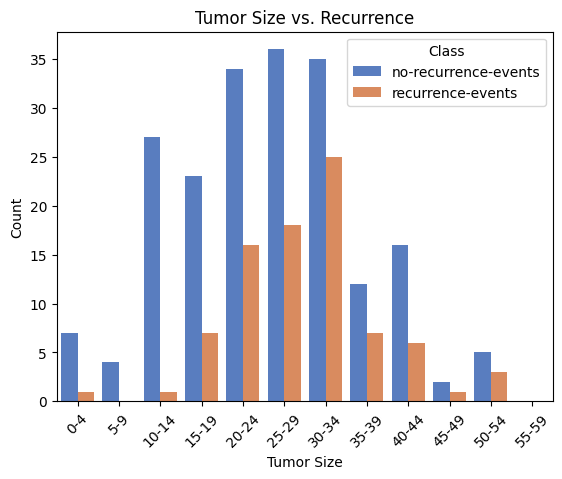

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct order for tumor size
tumor_size_order = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29',
                    '30-34', '35-39', '40-44', '45-49', '50-54', '55-59']

# Convert 'tumor_size' to a categorical variable with the correct order
df['tumor_size'] = pd.Categorical(df['tumor_size'], categories=tumor_size_order, ordered=True)

# Create the plot
sns.countplot(data=df, x='tumor_size', hue='Class', order=tumor_size_order, palette='muted')

# Add titles and labels
plt.title('Tumor Size vs. Recurrence')
plt.xlabel('Tumor Size')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Class')
plt.show()


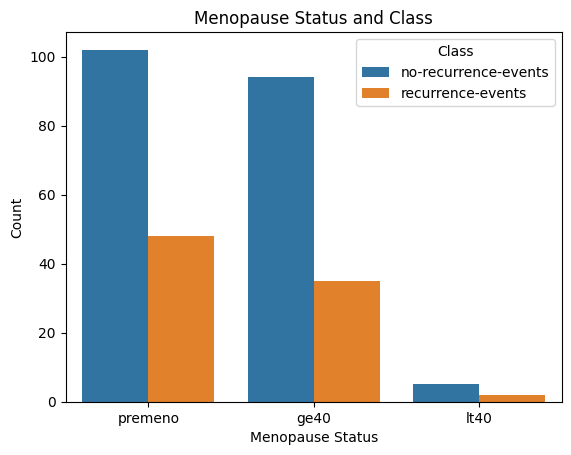

In [ ]:
sns.countplot(data=df, x='menopause', hue='Class')
plt.title('Menopause Status and Class')
plt.xlabel('Menopause Status')
plt.ylabel('Count')
plt.show()


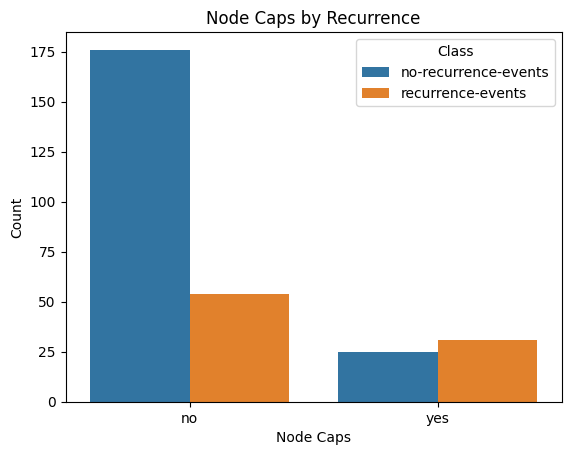

In [ ]:
sns.countplot(data=df, x='node_caps', hue='Class')
plt.title('Node Caps by Recurrence')
plt.xlabel('Node Caps')
plt.ylabel('Count')
plt.show()

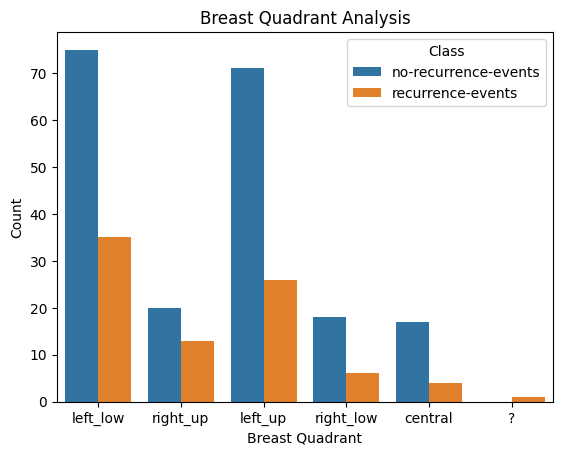

In [ ]:
sns.countplot(data=df, x='breast_quad', hue='Class')
plt.title('Breast Quadrant Analysis')
plt.xlabel('Breast Quadrant')
plt.ylabel('Count')
plt.show()


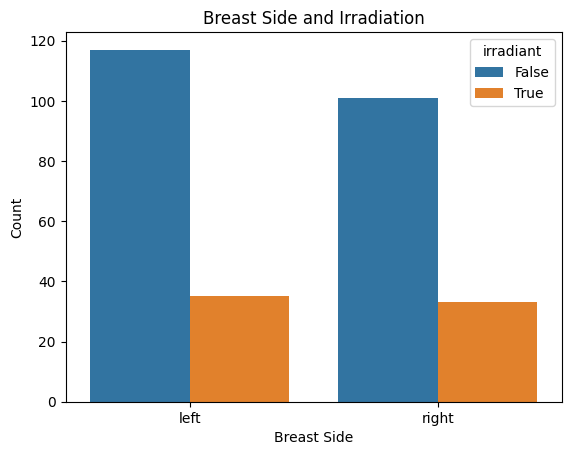

In [ ]:
sns.countplot(data=df, x='breast', hue='irradiant')
plt.title('Breast Side and Irradiation')
plt.xlabel('Breast Side')
plt.ylabel('Count')
plt.show()


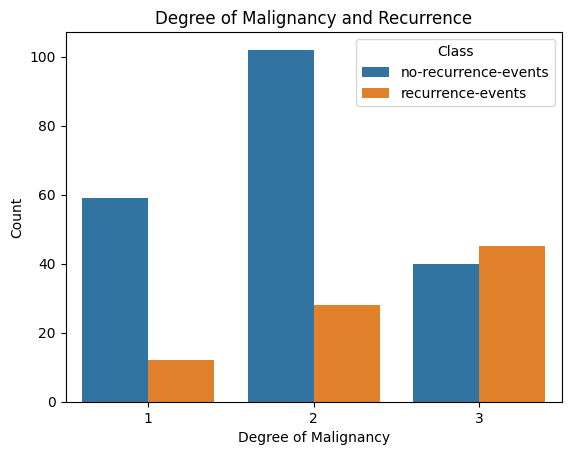

In [ ]:
sns.countplot(data=df, x='deg_maling', hue='Class')
plt.title('Degree of Malignancy and Recurrence')
plt.xlabel('Degree of Malignancy')
plt.ylabel('Count')
plt.show()


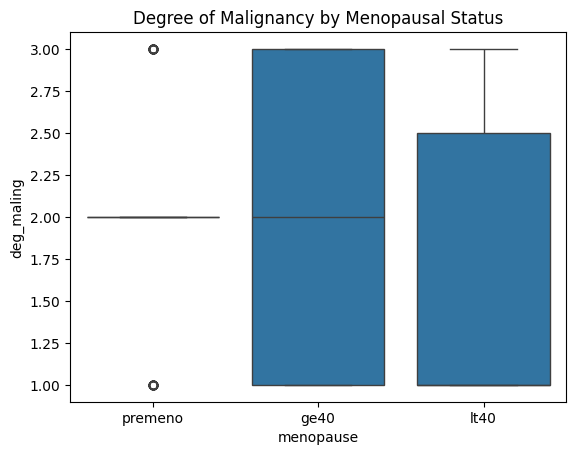

In [ ]:
sns.boxplot(data=df, x='menopause', y='deg_maling')
plt.title('Degree of Malignancy by Menopausal Status')
plt.show()


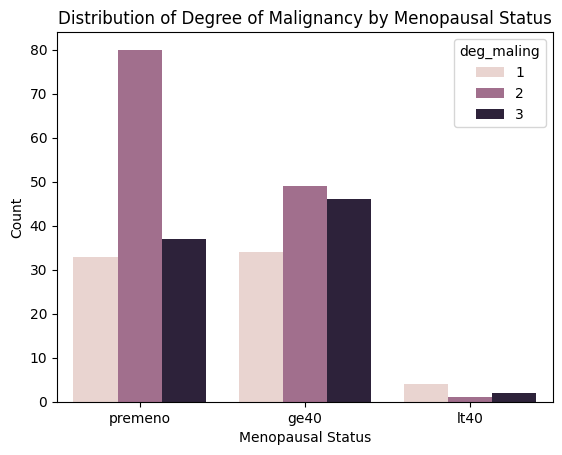

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot of 'deg_maling' by 'menopause'
sns.countplot(data=df, x='menopause', hue='deg_maling')
plt.title('Distribution of Degree of Malignancy by Menopausal Status')
plt.xlabel('Menopausal Status')
plt.ylabel('Count')
plt.show()


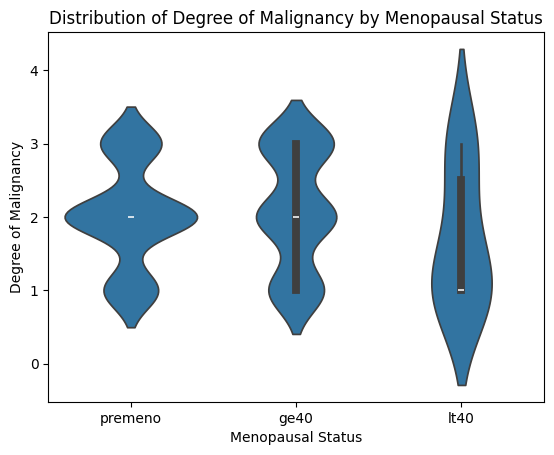

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot of 'deg_maling' by 'menopause'
sns.violinplot(data=df, x='menopause', y='deg_maling')
plt.title('Distribution of Degree of Malignancy by Menopausal Status')
plt.xlabel('Menopausal Status')
plt.ylabel('Degree of Malignancy')
plt.show()


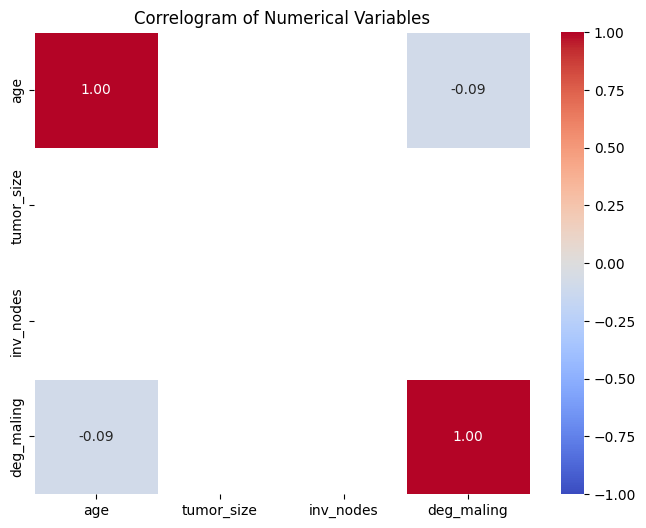

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns you want to analyze for correlations
numerical_vars = ['age', 'tumor_size', 'inv_nodes', 'deg_maling']

# Compute the correlation matrix
corr_matrix = df[numerical_vars].corr()

# Plot the heatmap (Correlogram)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlogram of Numerical Variables')
plt.show()


In [ ]:
# Convert 'age' column to numeric, coercing errors to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Check for NaN values after conversion
print(df['age'].isna().sum())


# Creating age groups
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Now use this 'age_group' for comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='age_group', y='deg_malig')
plt.title('Malignancy Degree vs Age Group')
plt.show()


286


ValueError: Could not interpret value `deg_malig` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>